In [33]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

<b>Transforming an image from color to grayscale</b>

Here we import the image file as an array of shape (nx, ny, nz)

In [34]:
image_file = 'image.jpg'
input_image = imread(image_file) 
[nx, ny, nz] = np.shape(input_image)  

Extracting each one of the RGB components

In [35]:
r_img, g_img, b_img = input_image[:, :, 0], input_image[:, :, 1], input_image[:, :, 2]

The following operation will take weights and parameters to convert the color image to grayscale

In [36]:
gamma = 1.400  
r_const, g_const, b_const = 0.2126, 0.7152, 0.0722 
grayscale_image = r_const * r_img ** gamma + g_const * g_img ** gamma + b_const * b_img ** gamma

This command will display the grayscale image alongside the original image

C:\Users\Parsa\AppData\Local\Temp/ipykernel_14716/2052145022.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


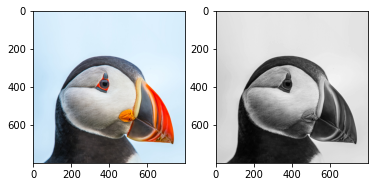

In [37]:
fig1 = plt.figure(1)
ax1, ax2 = fig1.add_subplot(121), fig1.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(grayscale_image, cmap=plt.get_cmap('gray'))
fig1.show()

<b>Applying the Sobel operator

Here we define the matrices associated with the Sobel filter

In [38]:
Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
[rows, columns] = np.shape(grayscale_image)  
sobel_filtered_image = np.zeros(shape=(rows, columns))  

Now we "sweep" the image in both x and y directions and compute the output

In [39]:
for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, grayscale_image[i:i + 3, j:j + 3]))  
        gy = np.sum(np.multiply(Gy, grayscale_image[i:i + 3, j:j + 3]))  
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)  

Display the original image and the Sobel filtered image

C:\Users\Parsa\AppData\Local\Temp/ipykernel_14716/532390323.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


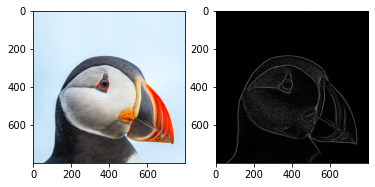

In [40]:
fig2 = plt.figure(2)
ax1, ax2 = fig2.add_subplot(121), fig2.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(sobel_filtered_image, cmap=plt.get_cmap('gray'))
fig2.show()

Show both images

In [41]:
plt.show()

Save the filtered image in destination path

In [42]:
plt.imsave('sobel_filtered_image.png', sobel_filtered_image, cmap=plt.get_cmap('gray'))